### Programation d'un neurone artificiel

#### Import des librarys

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from  utilities import load_data

#### Initialisation du dataset

X  (2, 100)
y  (1, 100)


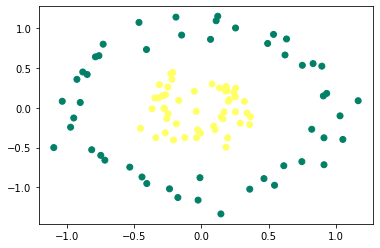

In [2]:
X, y = make_circles(n_samples = 100, noise=0.1, factor=0.3,random_state=0)
y = y.reshape((y.shape[0],1))

#on transpose les 2 matrices car les matrices des paramètres sont de dimensions m neurones, n facteurs
#le calule de Z se notera donc W.dot(X) (soit nW= m X.T) 
X= X.T 
y=y.T
print("X ", X.shape)
print("y ",y.shape)
plt.scatter(X[0,:],X[1,:], c = y, cmap="summer")
plt.show()

#### Fonction d'initialisation

In [3]:
def initialisation(m2,m1,n):
    #paramètre de la première couche
    #m1 nombre de ligne (autant qu'il y a de neuronne dans la couche), 
    #n nombre de colone (autant qu'il y a de facteurs en input)
    W1 = np.random.randn(m1,n)
    b1 = np.random.randn(m1,1)

    #paramètre de la deuxième couche
    #m2 nombre de ligne (autant qu'il y a de neuronne dans la couche), 
    #m1 nombre de colone (autant qu'il y a de neurones dans la couche précédente),
    #remarque: on garde le même n car le nombre de facteurs ne change pas, 
    #seul le nombre de neurone dans la couche peut changer
    W2 = np.random.randn(m2,m1)
    b2 = np.random.randn(m2,1)
    #print("W1 ", W1.shape)
    #print("b1 ", b1.shape)
    #print("W2 ", W2.shape)
    #print("b2 ", b2.shape)
    #on stocke nos paramètre dans un dictionnaire
    parametres = {
        "W2":W2,
        "b2":b2,
        "W1":W1,
        "b1":b1
    
    }

    return parametres

#### Model

In [12]:
def forward_propagation(X,parametres):
    #calcules pour la couche 1
    #note attention à l'ordre avec le produit matriciel (.dot()) car cela depend des dimmensions des matrices
    #ici nW1 = mX
    Z1 = parametres["W1"].dot(X) + parametres["b1"]
    A1 = 1/(1+ np.exp(-Z1))
    #resultat en dimmensions m= nombre de neurone, n = nombre de paramètre
    #print("Z1", Z1.shape)
    #print("A1",A1.shape)
    #calcules pour la couche 2
    Z2= parametres["W2"].dot(A1) + parametres["b2"]
    A2 = 1/(1+ np.exp(-Z2))

    activations = {
        "A1":A1,
        "A2":A2
    }
    return activations

#### Fonction coût/Log Loss

In [5]:
#on utilise plutot le log_loss de sklearn
#def log_loss(A,y):
 #   return (1/len(y))*np.sum(-y*np.log(A) - (1 - y)* np.log(1-A))

#### Gradients

In [6]:
#cette fonction permet le calcule des gradients à chaque nouvelle itération
def back_propagation(X,y,parametres,activations):
    m = y.shape[1]
    #calcule des gradients pour la couche 2
    dZ2= activations["A2"]-y
    #calcule de dL/dW2 
    dW2 = (1/m)*dZ2.dot(activations["A1"].T)
    #calcule de dL/db2
    #note: keepdims permet de conserver les dimmensions afin de ne pas se retrouver avec une dimmension de type (m,)
    db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)

    #calcule des gradients de la couche 1
    dZ1 = np.dot(parametres["W2"].T,dZ2)*activations["A1"]*(1 - activations["A1"])
    dW1 = (1/m)*dZ1.dot(X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)

    gradients = {
    "dW2":dW2,
    "db2":db2,
    "dW1":dW1,
    "db1":db1

    }
    return gradients

#### Update des poids

In [7]:
def update(gradients,parametres, learning_rate):
    parametres["W2"] = parametres["W2"] - learning_rate*gradients["dW2"]
    parametres["b2"] = parametres["b2"] - learning_rate*gradients["db2"]
    parametres["W1"] = parametres["W1"] - learning_rate*gradients["dW1"]
    parametres["b1"] = parametres["b1"] - learning_rate*gradients["db1"]
    return parametres

#### Fonction de prediction

In [8]:
def predict(X,parametres):
    activations = forward_propagation(X,parametres)
    return activations["A2"]>=0.5

#### Algorithme de descente de gradient

In [9]:
def neural_network(X_train,y_train,nb_neurone_couche1,nb_neurone_couche2,learning_rate=0.1,n_iter = 100):
    #initialisation des coefficients
    m1=nb_neurone_couche1
    m2=nb_neurone_couche2
    n = X_train.shape[0] #nombre de facteur mais on prend l'indice 0 car la matrice va être transposée
    parametres = initialisation(m2,m1,n)


    Loss_history = []
    accuracy_history_train = []

    Loss_history_test = []
    accuracy_history_test = []
    for i in range(n_iter):
        activations = forward_propagation(X_train,parametres)
        Loss_history.append(log_loss(y_train,activations["A2"],))
        gradients = back_propagation(X_train,y_train,parametres,activations)
        parametres = update( gradients, parametres, learning_rate)
        if i % 10 ==0:
            #Train
            Loss_history.append(log_loss(y_train,activations["A2"],))
            y_pred = predict(X_train,parametres)
            accuracy_history_train.append(accuracy_score(y_train.flatten(),y_pred.flatten()))

            #Test
           # activations_test = forward_propagation(X_train,parametres)
           # Loss_history_test.append(log_loss(y_test,activations_test["A2"]))
           # y_pred = predict(X_test,W,b)
           # accuracy_history_test.append(accuracy_score(y_test.flatten(),y_pred.flatten()))
    y_pred = predict(X,parametres)
    print("score : ", accuracy_score(y_train.flatten(),y_pred.flatten()))

    #graphique
    plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)
    plt.plot(Loss_history,label="Train Loss")
    #plt.plot(Loss_history_test,label="Test Loss")
    plt.legend()

    plt.subplot(2,2,2)
    plt.plot(accuracy_history_train,label="Train Accuracy")
    #plt.plot(accuracy_history_test,label="Test Accuracy")
    plt.legend()
    plt.show() # affiche la figure a l'ecran
    return parametres

#### Test

Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)
A2  (1, 100)
Z2  (1, 100)

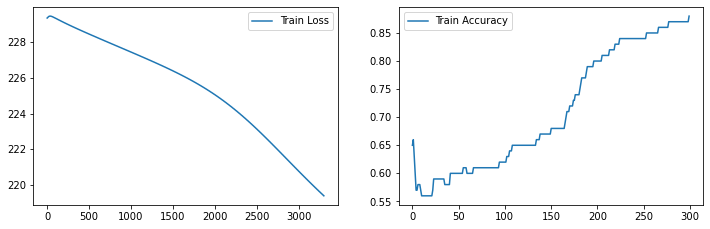

In [10]:
parametres = neural_network(X,y,3,1,0.1,3000)

#### Mise en production

In [11]:
new_data = np.array([2,1])
#on trace la frontiere de décision
x0 = np.linspace(-1,4,100)
x1 = (-W[0]*x0-b)/W[1]
plt.plot(x0,x1,c="orange",lw=3)
#on regarde où est cette donnée sur le graphique
plt.scatter(X[:,0],X[:,1],c = y, cmap="summer")
plt.scatter(new_data[0],new_data[1],c = "red")
predict(new_data,W,b)

NameError: name 'W' is not defined